# Git processor demo

Here is a little demo that you can reuse for your own project.

In [89]:
import os

from git_processor.data import Projects


### Create the project and show the dataframe

The `stats.txt` is generated using git log magic

In [90]:
p = Projects(os.path.abspath("stats.txt"))
p.df


,name,project A,project B,project C
0,hero,122.0,0.0,0.0
1,dog,100.0,12.0,0.0
2,owl,29.0,10.0,0.0
3,loco,6.0,0.0,0.0
4,monkey,6.0,0.0,0.0
5,coder,3.0,2.0,0.0
6,spy,1.0,0.0,0.0
7,owl2,0.0,5.0,0.0
8,badog,0.0,0.0,98.0
9,éspy,0.0,0.0,53.0


### Clean up the name

So that developpers with multiple git aliases gets recognized as one:

ex: 
- `owl` and `owl2` are the same "person"
- `locom1`, `locmo`, `locom` too

In [91]:
p.clean_up_names()
p.df


,name,project A,project B,project C
0,dog,100.0,12.0,98.0
1,hero,122.0,0.0,0.0
2,locom,6.0,0.0,26.0
3,monkey,6.0,0.0,0.0
4,owl,29.0,15.0,0.0
5,spy,1.0,0.0,53.0
6,thecoder,3.0,2.0,1.0


### Plot the amount of commit per user

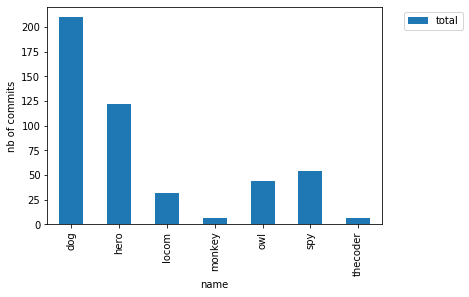

In [92]:
plot = p.total().plot.bar(x='name', y='total')
plot.set_ylabel('nb of commits')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Display only the amount of commit of the coder with animal aliases

In order to filter for specific users and display their stats.

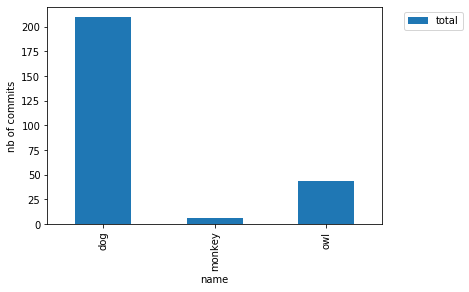

In [93]:
from git_processor.parser import filter_user

filtered_df = filter_user(p.df, ['dog', 'monkey', 'owl'])
filtered_total = filtered_df.sum(axis=1, skipna=True).reset_index(name='total')

plot = filtered_total.plot.bar(x='name', y='total')
plot.set_ylabel('nb of commits')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Display percentage of total commit per user

For all project:

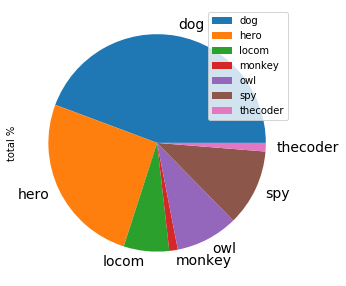

In [94]:
plot = p.user_percentage().plot.pie(y='total %', figsize=(5, 5), fontsize=14)

For a specific project:

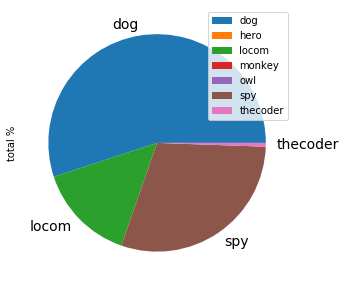

In [95]:
plot = p.user_percentage_project("project C").plot.pie(y='total %', figsize=(5, 5), fontsize=14)

### Display average number commits per user


Get the Average values from dataframe

In [102]:
average = p.projects_average()
average['total %'] = p.projects_percentage()['total %']
average

name,dog,hero,locom,monkey,owl,spy,thecoder,total,average,total %
project A,100.0,122.0,6.0,6.0,29.0,1.0,3.0,267.0,33,56.33
project B,12.0,0.0,0.0,0.0,15.0,0.0,2.0,29.0,3,6.12
project C,98.0,0.0,26.0,0.0,0.0,53.0,1.0,178.0,22,37.55
total,210.0,122.0,32.0,6.0,44.0,54.0,6.0,474.0,59,100.00


All user and their average amount of commits per projects.

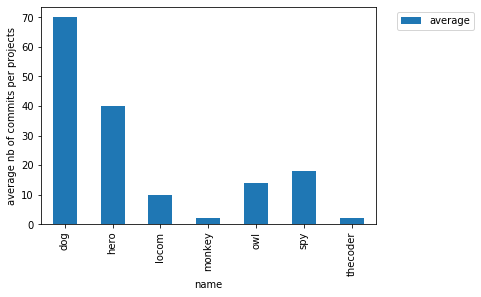

In [96]:
plot = p.user_average().reset_index().plot.bar(x='name', y='average')
plot.set_ylabel('average nb of commits per projects')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

All user and the total amount of commits breakdown into projects

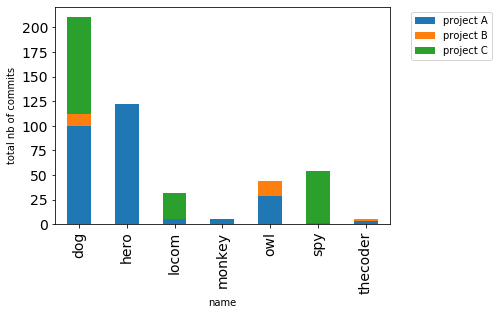

In [97]:
plot = p.df.set_index('name').plot.bar(stacked=True, fontsize=14)
plot.set_ylabel('total nb of commits')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Contribution per user with projects (unstack)

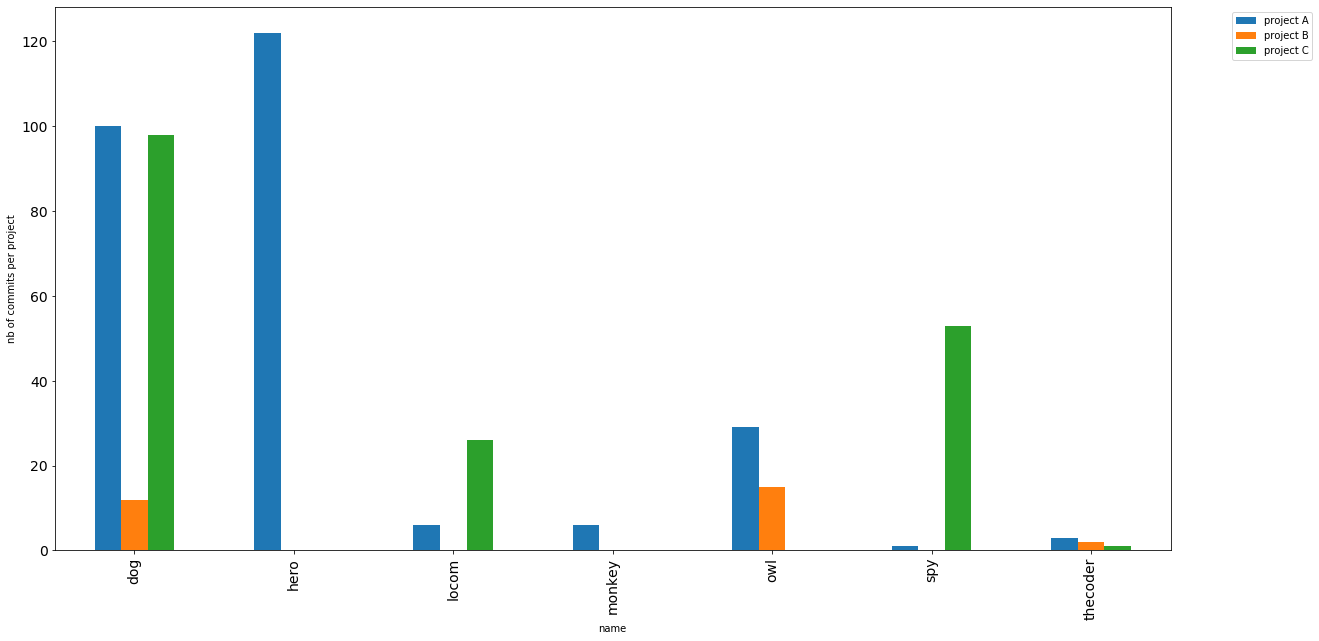

In [112]:
plot = average.drop('total').transpose().drop(['total', 'total %', 'average']).plot.bar(figsize=(20,10), fontsize=14)
plot.set_ylabel('nb of commits per project')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Data with projects

Correlation between contributors and number of commits

In [98]:
import matplotlib.pyplot as plt

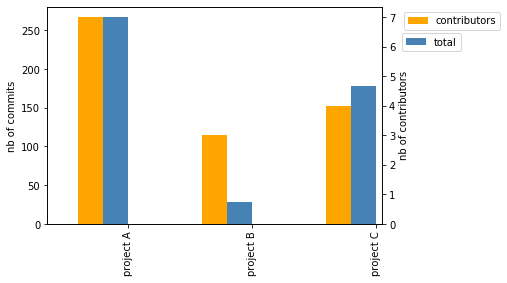

In [99]:
fig = plt.figure() 
ax1 = fig.add_subplot(111) 

df = p.projects_total().drop(['total'], axis=0).reset_index()
plot = df.total.plot.bar(color='steelblue', y="nb of ", ax=ax1, width=0.2, position=1)
ax1.set_ylabel('nb of commits')
plt.legend(bbox_to_anchor=(1.25, 0.90), loc='upper right')
ax2 = ax1.twinx() 
plot = p.contributors().plot.bar(color='orange', ax=ax2, width=0.2, position=2)
ax2.set_ylabel('nb of contributors')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Scatter plot, of number of commits versus number of contributors

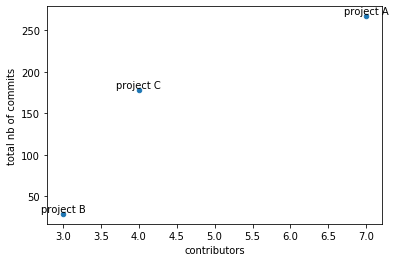

In [108]:
df = p.contributors()
df['total'] = p.projects_total()['total']
fig, ax = plt.subplots()
plot = df.plot('contributors', 'total', kind='scatter', ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v, ha='center', va='bottom')
    
plot.set_ylabel('total nb of commits')
plt.show()

Contribution per projects, per users (stacked)

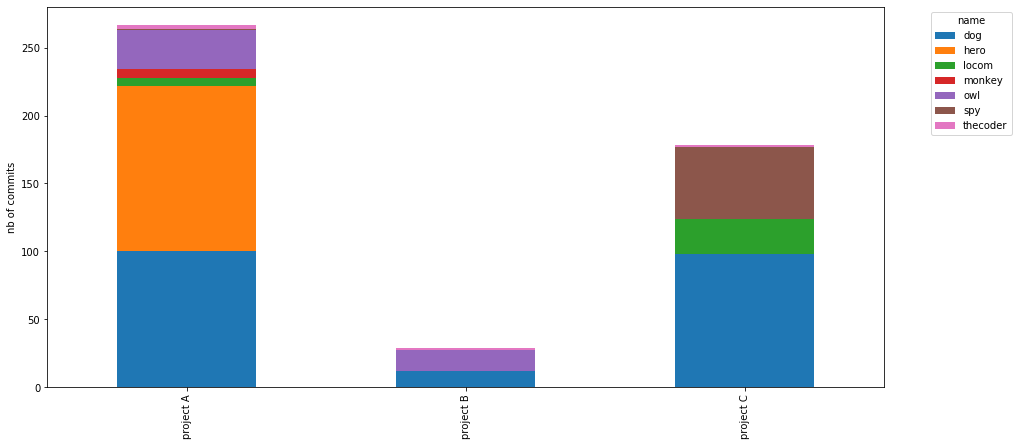

In [109]:
plot = p.df.set_index('name').transpose().plot.bar(stacked=True, figsize=(15,7))
plot.set_ylabel('nb of commits')
plot.legend(title='name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Contribution per projects, per users (unstacked)

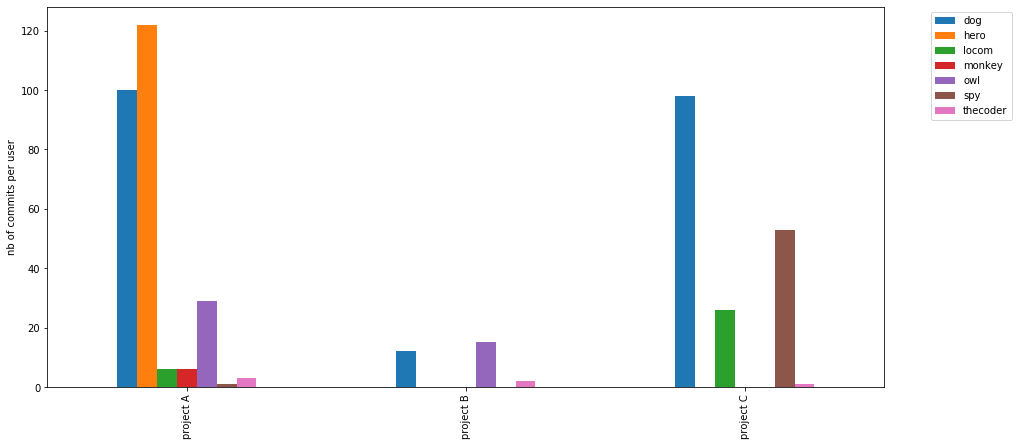

In [104]:
plot = average.drop('total').drop(['total', 'total %', 'average'], 1).plot.bar(figsize=(15,7))
plot.set_ylabel('nb of commits per user')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Contribution for a user to projects

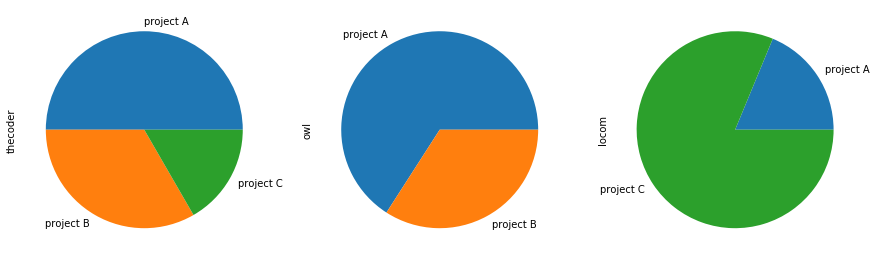

In [105]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

_ = average['thecoder'].drop('total').transpose().plot.pie(ax=ax1)
_ = average['owl'].drop('total').transpose().plot.pie(ax=ax2)
_ = average['locom'].drop('total').transpose().plot.pie(ax=ax3)

Get the number of projects users are contributing to

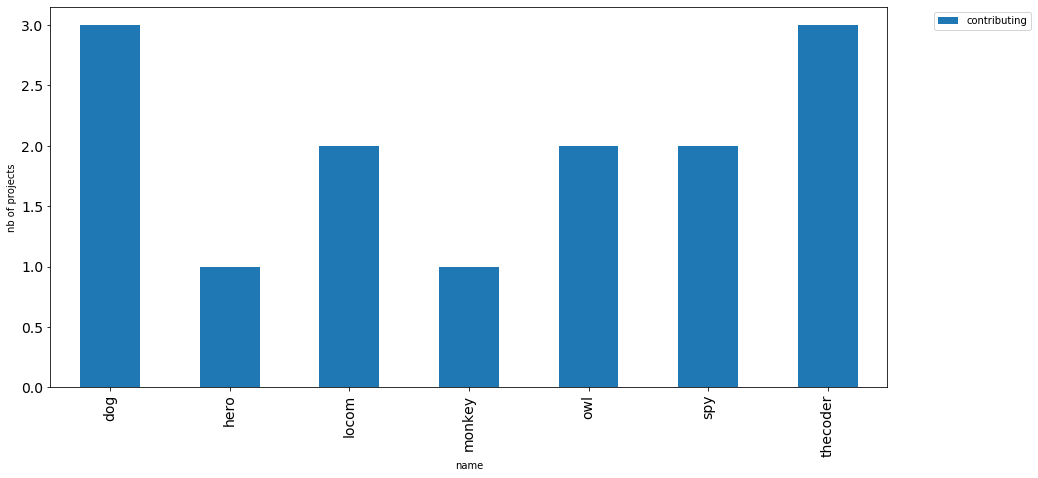

In [110]:
plot = p.projects_contributing().plot.bar(fontsize=14, figsize=(15,7))
plot.set_ylabel('nb of projects')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()